In [ ]:
!unzip /content/train_features.csv.zip

Archive:  /content/train_features.csv.zip
  inflating: train_features.csv      


In [ ]:
# Import All Required Libraries

# Data Loading and processing
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Feature Engineering
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Models and Evaluation Metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
# Load the dataset to pandas dataframe
df = pd.read_csv("/content/train_features.csv")

In [ ]:
# View top 5 rows from dataset
df.head(5)

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
0,1,2016-01-01 00:00:00,NaN,0,0,Education,2720,104,0,19.4,...,4.116,3.981,4.146,4.12,3.569,4.489,4.079,3.554,3.538,3.845
1,32,2016-01-01 00:00:00,NaN,0,0,Office,48392,105,0,19.4,...,4.116,3.981,4.146,4.12,4.513,4.211,4.079,4.128,4.579,4.317
2,41,2016-01-01 00:00:00,NaN,0,0,Office,93860,68,0,19.4,...,4.116,3.981,4.146,4.12,4.108,4.211,4.079,4.103,4.140,4.114
3,55,2016-01-01 00:00:00,NaN,0,0,Office,16726,111,0,19.4,...,4.116,3.981,4.146,4.12,3.506,4.211,4.079,3.308,3.565,3.813
4,69,2016-01-01 00:00:00,NaN,0,0,Parking,387638,100,0,19.4,...,4.116,3.981,4.146,4.12,3.035,3.623,4.079,3.892,3.090,3.577


In [ ]:
# View last 5 rows from dataset
df.tail(5)

,building_id,timestamp,meter_reading,anomaly,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
1749489,1316,2016-12-31 23:00:00,38.844,0,14,Entertainment/public assembly,49975,255,0,-29.9,...,4.116,4.009,4.012,4.056,3.910,3.532,4.710,4.179,3.802,3.865
1749490,1318,2016-12-31 23:00:00,202.893,0,14,Entertainment/public assembly,73488,255,0,-29.9,...,4.116,4.009,4.012,4.056,4.959,3.532,4.710,4.963,4.977,5.318
1749491,1319,2016-12-31 23:00:00,NaN,0,14,Entertainment/public assembly,287419,255,0,-29.9,...,4.116,4.009,4.012,4.056,4.875,3.532,4.710,4.883,4.928,4.906
1749492,1323,2016-12-31 23:00:00,172.000,0,14,Office,87200,255,0,-29.9,...,4.116,4.009,4.012,4.056,5.210,4.211,4.710,5.283,5.160,5.157
1749493,1353,2016-12-31 23:00:00,2.400,0,15,Religious worship,22201,255,0,-29.9,...,4.116,4.009,4.012,4.056,1.967,1.556,4.188,1.750,1.896,1.566


In [ ]:
# Check data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1749494 entries, 0 to 1749493
Data columns (total 57 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   building_id                    int64  
 1   timestamp                      object 
 2   meter_reading                  float64
 3   anomaly                        int64  
 4   site_id                        int64  
 5   primary_use                    object 
 6   square_feet                    int64  
 7   year_built                     int64  
 8   floor_count                    int64  
 9   air_temperature                float64
 10  cloud_coverage                 int64  
 11  dew_temperature                float64
 12  precip_depth_1_hr              int64  
 13  sea_level_pressure             float64
 14  wind_direction                 int64  
 15  wind_speed                     float64
 16  air_temperature_mean_lag7      float64
 17  air_temperature_max_lag7       float64
 18  ai

In [ ]:
# CHeck for NULL values
df.isnull().sum()

,0
building_id,0
timestamp,0
meter_reading,107653
anomaly,0
site_id,0
primary_use,0
square_feet,0
year_built,0
floor_count,0
air_temperature,0


In [ ]:
# Data Descriptions
df.describe()

,building_id,meter_reading,anomaly,site_id,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,...,gte_meter,gte_meter_hour,gte_meter_weekday,gte_meter_month,gte_meter_building_id,gte_meter_primary_use,gte_meter_site_id,gte_meter_building_id_hour,gte_meter_building_id_weekday,gte_meter_building_id_month
count,1.749494e+06,1.641841e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,...,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06,1.749494e+06
mean,7.908894e+02,1.799018e+02,2.131816e-02,7.819728e+00,1.065658e+05,1.925582e+02,1.002549e+00,1.650747e+01,1.169304e+02,8.809186e+00,...,4.116000e+00,4.116496e+00,4.116366e+00,4.115904e+00,4.315819e+00,4.205350e+00,4.261428e+00,4.315266e+00,4.315661e+00,4.314160e+00
std,4.118085e+02,3.959129e+02,1.444428e-01,4.830006e+00,1.025531e+05,8.934352e+01,2.237710e+00,1.032373e+01,1.263866e+02,9.871421e+00,...,1.297691e-10,1.172369e-01,7.456097e-02,4.426736e-02,1.360274e+00,3.888381e-01,6.918509e-01,1.380285e+00,1.365402e+00,1.367109e+00
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.980000e+02,0.000000e+00,0.000000e+00,-2.990000e+01,0.000000e+00,-3.600000e+01,...,4.116000e+00,3.942000e+00,3.989000e+00,4.056000e+00,4.370000e-01,1.556000e+00,2.670000e+00,4.070000e-01,4.030000e-01,4.300000e-02
25%,3.450000e+02,3.000000e+01,0.000000e+00,3.000000e+00,3.182900e+04,8.200000e+01,0.000000e+00,9.100000e+00,0.000000e+00,2.000000e+00,...,4.116000e+00,4.009000e+00,4.012000e+00,4.078000e+00,3.537000e+00,4.211000e+00,4.090000e+00,3.522000e+00,3.539000e+00,3.536000e+00
50%,8.960000e+02,8.410000e+01,0.000000e+00,9.000000e+00,7.108800e+04,2.550000e+02,0.000000e+00,1.670000e+01,4.000000e+00,9.700000e+00,...,4.116000e+00,4.138000e+00,4.147000e+00,4.102000e+00,4.442000e+00,4.211000e+00,4.548000e+00,4.395000e+00,4.406000e+00,4.410000e+00
75%,1.147000e+03,1.990000e+02,0.000000e+00,1.300000e+01,1.383160e+05,2.550000e+02,0.000000e+00,2.440000e+01,2.550000e+02,1.670000e+01,...,4.116000e+00,4.244000e+00,4.173000e+00,4.162000e+00,5.238000e+00,4.489000e+00,4.662000e+00,5.270000e+00,5.238000e+00,5.262000e+00
max,1.353000e+03,6.596890e+03,1.000000e+00,1.500000e+01,4.843760e+05,2.550000e+02,1.200000e+01,4.720000e+01,2.550000e+02,2.610000e+01,...,4.116000e+00,4.265000e+00,4.176000e+00,4.186000e+00,8.424000e+00,4.891000e+00,7.270000e+00,8.576000e+00,8.493000e+00,8.458000e+00


EDA Visualizations

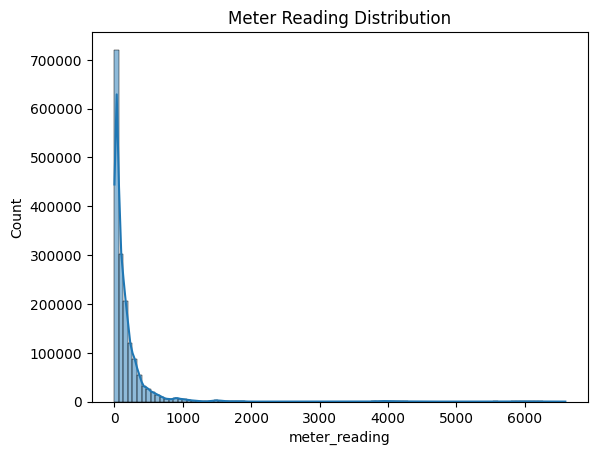

In [ ]:
# Histogram of meter reading
sns.histplot(df['meter_reading'].dropna(), bins=100, kde=True)
plt.title("Meter Reading Distribution")
plt.show()

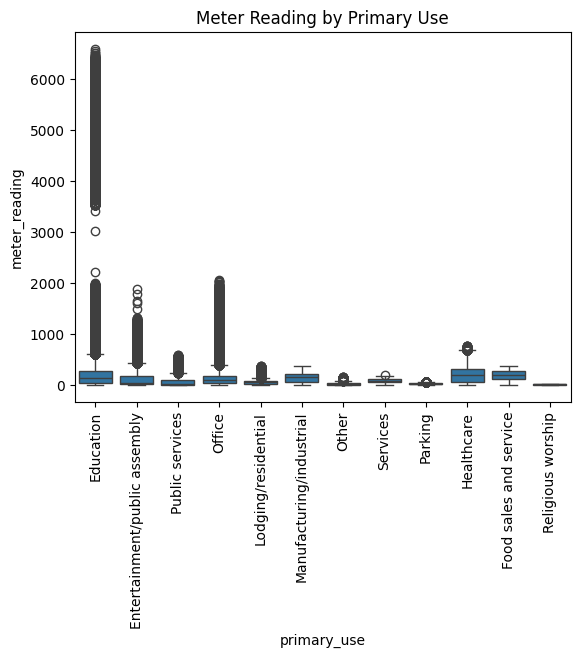

In [ ]:
# Boxplot of meter reading by primary use
sns.boxplot(x='primary_use', y='meter_reading', data=df[df['meter_reading'].notna()])
plt.xticks(rotation=90)
plt.title("Meter Reading by Primary Use")
plt.show()

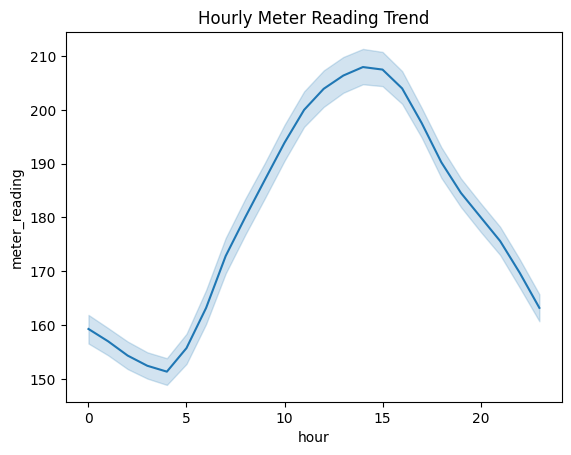

In [ ]:
# Lineplot showing average meter reading by hour
sns.lineplot(x='hour', y='meter_reading', data=df[df['meter_reading'].notna()])
plt.title("Hourly Meter Reading Trend")
plt.show()

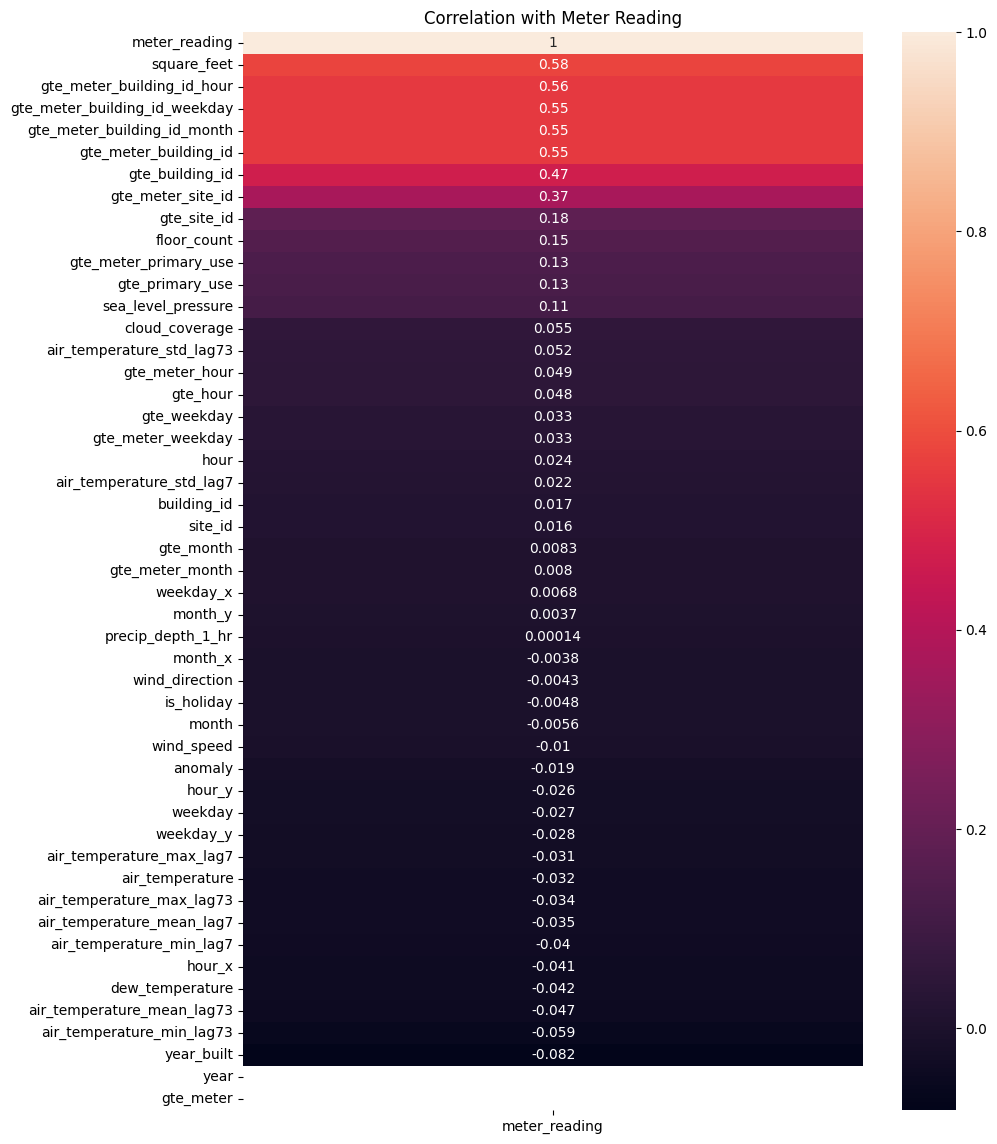

In [ ]:
#  Heatmap of correlation with meter reading
plt.figure(figsize=(10, 14))
sns.heatmap(df.corr(numeric_only=True)[['meter_reading']].sort_values('meter_reading', ascending=False), annot=True)
plt.title("Correlation with Meter Reading")
plt.show()

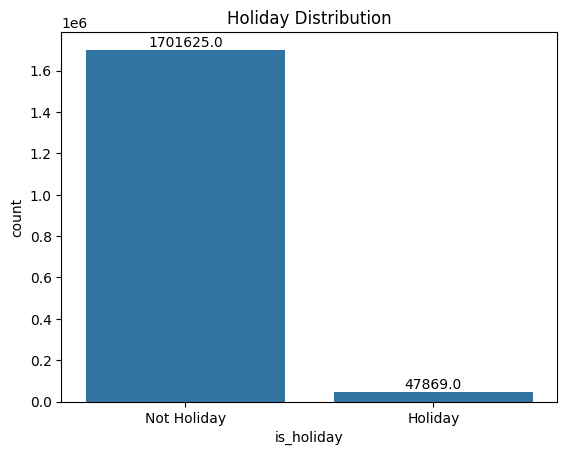

In [ ]:
# Countplot for holiday distribution - Showing total Number of rows with Holiday Distribution
ax = sns.countplot(x='is_holiday', data=df)
plt.title("Holiday Distribution")
plt.xticks([0, 1], ['Not Holiday', 'Holiday'])
# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

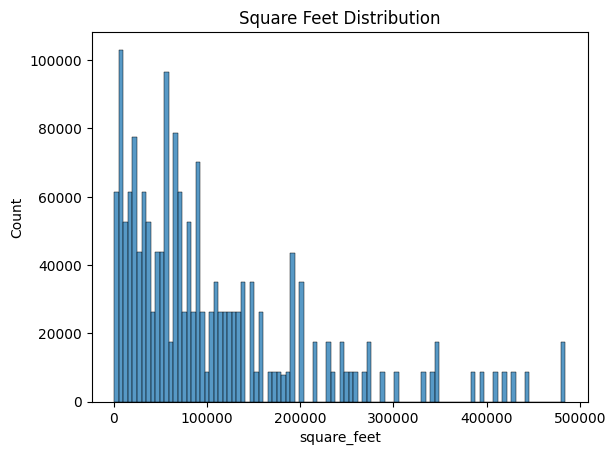

In [ ]:
# Histogram of square feet
sns.histplot(df['square_feet'], bins=100)
plt.title("Square Feet Distribution")
plt.show()

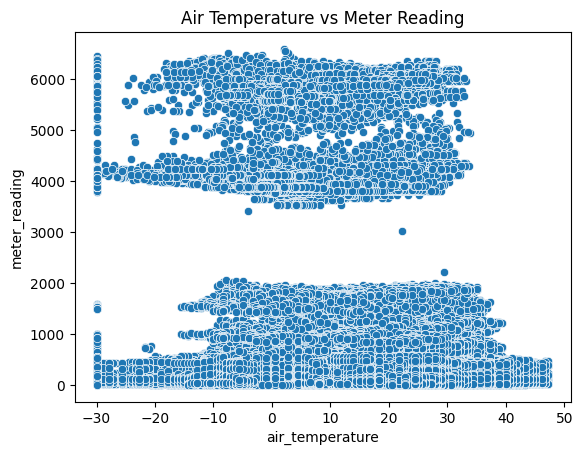

In [ ]:
# Scatterplot: air temperature vs meter reading
sns.scatterplot(x='air_temperature', y='meter_reading', data=df[df['meter_reading'].notna()])
plt.title("Air Temperature vs Meter Reading")
plt.show()

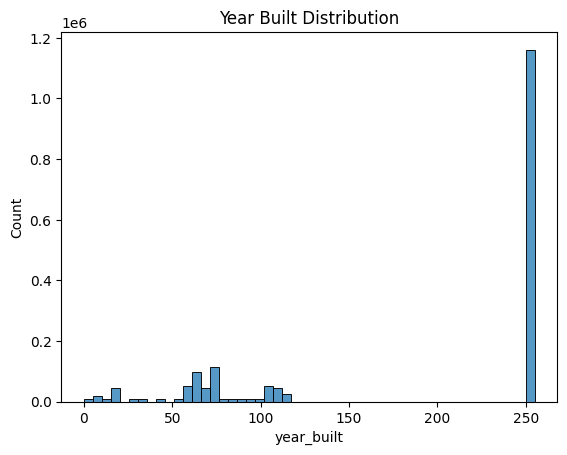

In [ ]:
# Histogram of year built
sns.histplot(df['year_built'], bins=50)
plt.title("Year Built Distribution")
plt.show()

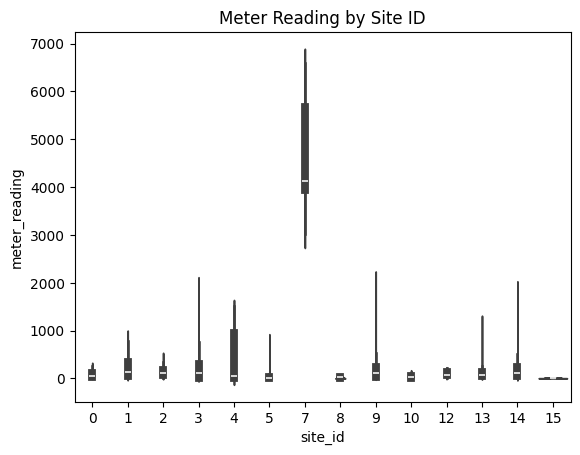

In [ ]:
# Violin plot: site ID vs meter reading
sns.violinplot(x='site_id', y='meter_reading', data=df[df['meter_reading'].notna()])
plt.title("Meter Reading by Site ID")
plt.show()

In [ ]:
# Feature Engineering
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['weekday'] = df['timestamp'].dt.weekday
df['month'] = df['timestamp'].dt.month

df['primary_use'] = LabelEncoder().fit_transform(df['primary_use'])

In [ ]:
# Fill missing meter_reading with median
df['meter_reading'] = df['meter_reading'].fillna(df['meter_reading'].median())

In [ ]:
df['anomaly'].value_counts()

,count
anomaly,
0,1712198
1,37296


In [ ]:
anomaly_data = df[df['anomaly'] == 1]
normal_data = df[df['anomaly'] == 0]

# Check the current counts of anomaly and non-anomaly data
print(f"Original Anomaly Count: {len(anomaly_data)}")
print(f"Original Normal Count: {len(normal_data)}")

anomaly_sample_size = min(25000, len(anomaly_data))

# Sample 25000 anomaly rows
sampled_anomaly_data = anomaly_data.sample(n=anomaly_sample_size, replace=False, random_state=42)
normal_sample_size = 50000 - anomaly_sample_size

# Ensure we don't ask for more normal data than available
normal_sample_size = min(normal_sample_size, len(normal_data))

# Sample the required number of normal rows
sampled_normal_data = normal_data.sample(n=normal_sample_size, replace=False, random_state=42)

# Concatenate the sampled dataframes
balanced_df = pd.concat([sampled_anomaly_data, sampled_normal_data], ignore_index=True)

# Shuffle the combined dataframe
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

# Check the new counts
print(f"\nSampled Anomaly Count: {balanced_df['anomaly'].sum()}")
print(f"Sampled Normal Count: {len(balanced_df) - balanced_df['anomaly'].sum()}")
print(f"Total Sampled Rows: {len(balanced_df)}")

Original Anomaly Count: 37296
Original Normal Count: 1712198

Sampled Anomaly Count: 25000
Sampled Normal Count: 25000
Total Sampled Rows: 50000


In [ ]:
# Define target and features
target = 'anomaly'
features = ['building_id', 'site_id', 'primary_use', 'square_feet', 'year_built', 'floor_count',
            'air_temperature', 'dew_temperature', 'wind_speed', 'cloud_coverage',
            'hour', 'weekday', 'month', 'is_holiday', 'meter_reading']

In [ ]:
# Split target and feature columns
X = balanced_df[features]
y = balanced_df[target]

In [ ]:
# Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, stratify=y, random_state=42)

### Model Building

In [ ]:
# Model 1: Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
# Fit training data to model
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make Predictions
y_pred_rf = rf.predict(X_test)
y_proba_rf = rf.predict_proba(X_test)[:, 1]

In [ ]:
# Model Evaluation
print("Random Forest Results")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf))

Random Forest Results
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5000
           1       0.97      0.93      0.95      5000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

ROC AUC: 0.9878552800000001


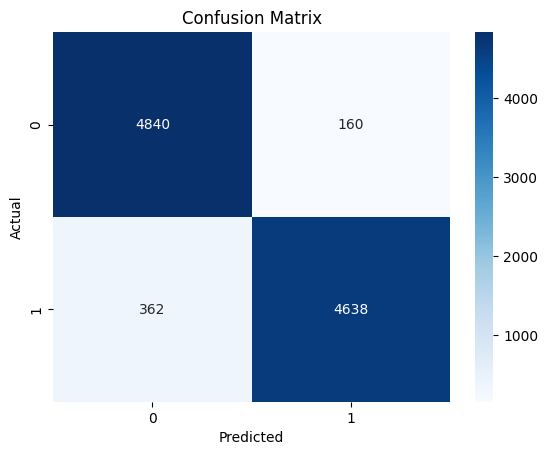

In [ ]:
# Plot confusion Matrix
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Tunned Random FOrest Model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Random Forest Tuning
# Define parameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10,],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

In [ ]:
random_search_rf = RandomizedSearchCV(RandomForestClassifier(),
                                      param_distributions=param_dist_rf,cv=3,
                                      scoring='roc_auc',random_state=42,n_jobs=-1)

In [ ]:
# Fit RandomizedSearchCV to the training data
random_search_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [None, 10],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [50, 100]},
                   random_state=42, scoring='roc_auc')

In [ ]:
# Get the best parameters and best score
best_params_rf = random_search_rf.best_params_
best_score_rf = random_search_rf.best_score_

print("Best parameters for Random Forest:", best_params_rf)
print("Best ROC AUC score for Random Forest (from CV):", best_score_rf)

Best parameters for Random Forest: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best ROC AUC score for Random Forest (from CV): 0.9822336450979979


In [ ]:
# Use the best estimator to make predictions on the test set
best_rf_model = random_search_rf.best_estimator_
y_pred_rf_tuned = best_rf_model.predict(X_test)
y_proba_rf_tuned = best_rf_model.predict_proba(X_test)[:, 1]

In [ ]:
# Evaluate the tuned Random Forest model
print("\nTuned Random Forest Results on Test Set:")
print(classification_report(y_test, y_pred_rf_tuned))
print("ROC AUC:", roc_auc_score(y_test, y_proba_rf_tuned))


Tuned Random Forest Results on Test Set:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      5000
           1       0.97      0.93      0.95      5000

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000

ROC AUC: 0.9881698800000001


In [ ]:
# Model 2: XGBoost Classifier
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, use_label_encoder=False, eval_metric='logloss', random_state=42)

In [ ]:
# Fit the training data to model
xgb.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:31:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Make Prediction
y_pred_xgb = xgb.predict(X_test)
y_proba_xgb = xgb.predict_proba(X_test)[:, 1]

In [ ]:
# Model evaluation
print("XGBoost Results")
print(classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, y_proba_xgb))

XGBoost Results
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      5000
           1       0.93      0.81      0.87      5000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.87     10000
weighted avg       0.88      0.87      0.87     10000

ROC AUC: 0.9503405199999999


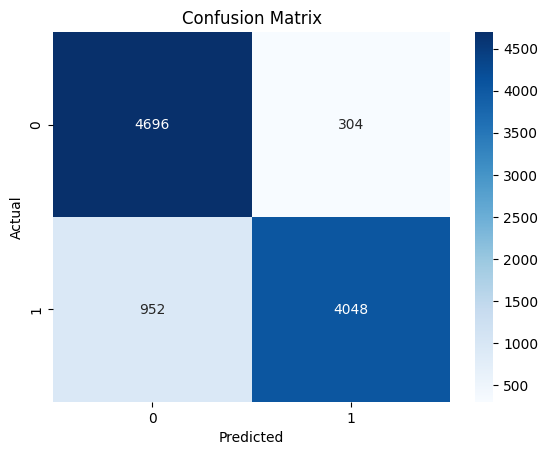

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Model 3: Decision Tree Classifier
dt = DecisionTreeClassifier(random_state=42)

In [ ]:
# Fit the training data to model
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make Predictions
y_pred_dt = dt.predict(X_test)
y_proba_dt = dt.predict_proba(X_test)[:, 1]

In [ ]:
# Model Evaluation
print("\nDecision Tree Results")
print(classification_report(y_test, y_pred_dt))
print("ROC AUC:", roc_auc_score(y_test, y_proba_dt))


Decision Tree Results
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      5000
           1       0.90      0.92      0.91      5000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

ROC AUC: 0.9061999999999999


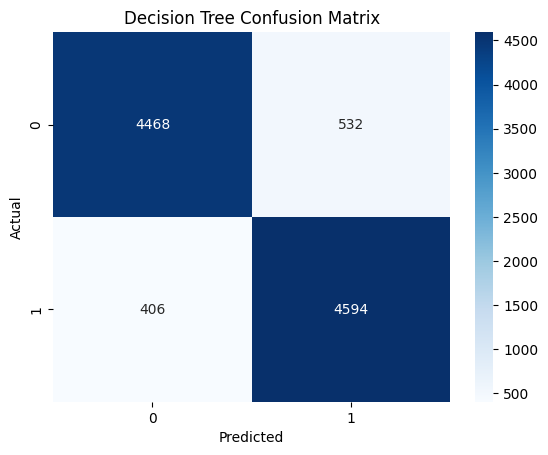

In [ ]:
# Plot confusion Matrix
cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Model 4: K-Nearest Neighbors Classifier
knn = KNeighborsClassifier()

In [ ]:
# Fit the training data to model
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Make Predictions
y_pred_knn = knn.predict(X_test)
y_proba_knn = knn.predict_proba(X_test)[:, 1]

In [ ]:
# Model Evaluation
print("\nK-Nearest Neighbors Results")
print(classification_report(y_test, y_pred_knn))
print("ROC AUC:", roc_auc_score(y_test, y_proba_knn))


K-Nearest Neighbors Results
              precision    recall  f1-score   support

           0       0.86      0.71      0.78      5000
           1       0.75      0.88      0.81      5000

    accuracy                           0.79     10000
   macro avg       0.80      0.79      0.79     10000
weighted avg       0.80      0.79      0.79     10000

ROC AUC: 0.88019874


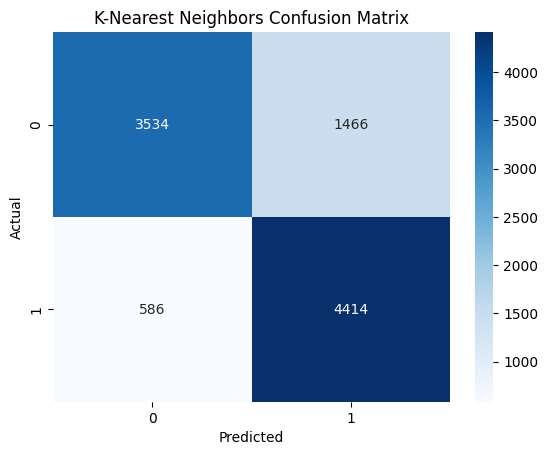

In [ ]:
# Plot confusion Matrix
cm = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('K-Nearest Neighbors Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

* Model Comparison

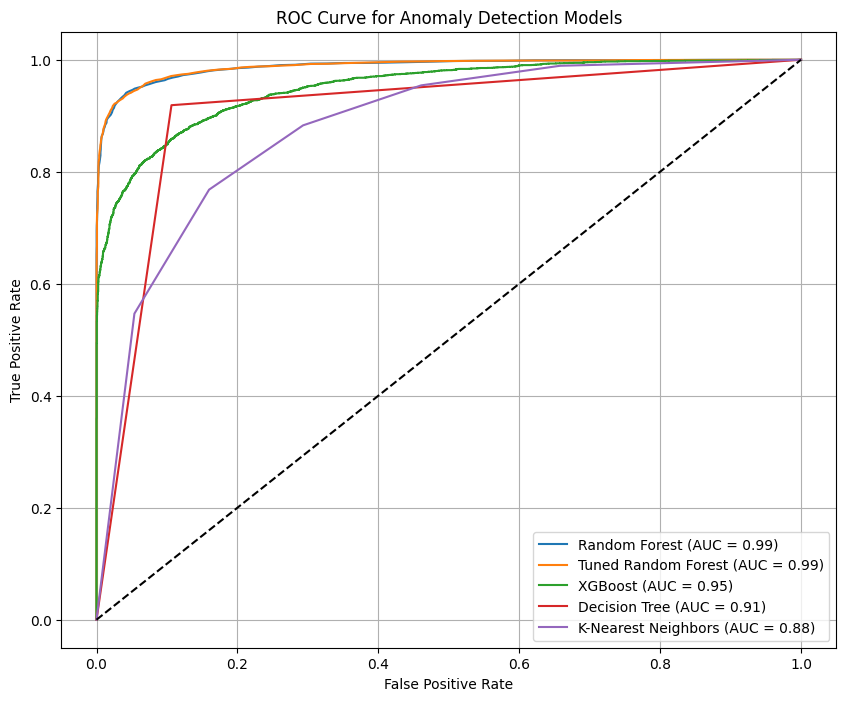

In [ ]:
# Calculate ROC curves for each model
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_rf_tuned, tpr_rf_tuned, _ = roc_curve(y_test, y_proba_rf_tuned)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_proba_dt)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_proba_knn)
# Plot the ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf):.2f})')
plt.plot(fpr_rf_tuned, tpr_rf_tuned, label=f'Tuned Random Forest (AUC = {roc_auc_score(y_test, y_proba_rf_tuned):.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_score(y_test, y_proba_xgb):.2f})')
plt.plot(fpr_dt, tpr_dt, label=f'Decision Tree (AUC = {roc_auc_score(y_test, y_proba_dt):.2f})')
plt.plot(fpr_knn, tpr_knn, label=f'K-Nearest Neighbors (AUC = {roc_auc_score(y_test, y_proba_knn):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Anomaly Detection Models')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Collect metrics
models = ['Random Forest', 'Tuned Random Forest', 'XGBoost', 'Decision Tree', 'K-Nearest Neighbors']
# Classification report for each model
report_rf = classification_report(y_test, y_pred_rf, output_dict=True)
report_rf_tuned = classification_report(y_test, y_pred_rf_tuned, output_dict=True)
report_xgb = classification_report(y_test, y_pred_xgb, output_dict=True)
report_dt = classification_report(y_test, y_pred_dt, output_dict=True)
report_knn = classification_report(y_test, y_pred_knn, output_dict=True)

In [ ]:
# Extract relevant metrics
metrics = {}
metrics['Random Forest'] = {
    'Accuracy': report_rf['accuracy'],
    'Precision (Anomaly)': report_rf['1']['precision'],
    'Recall (Anomaly)': report_rf['1']['recall'],
    'F1-Score (Anomaly)': report_rf['1']['f1-score'],
    'ROC AUC': roc_auc_score(y_test, y_proba_rf)
}
metrics['Tuned Random Forest'] = {
    'Accuracy': report_rf_tuned['accuracy'],
    'Precision (Anomaly)': report_rf_tuned['1']['precision'],
    'Recall (Anomaly)': report_rf_tuned['1']['recall'],
    'F1-Score (Anomaly)': report_rf_tuned['1']['f1-score'],
    'ROC AUC': roc_auc_score(y_test, y_proba_rf_tuned)
}
metrics['XGBoost'] = {
    'Accuracy': report_xgb['accuracy'],
    'Precision (Anomaly)': report_xgb['1']['precision'],
    'Recall (Anomaly)': report_xgb['1']['recall'],
    'F1-Score (Anomaly)': report_xgb['1']['f1-score'],
    'ROC AUC': roc_auc_score(y_test, y_proba_xgb)
}
metrics['Decision Tree'] = {
    'Accuracy': report_dt['accuracy'],
    'Precision (Anomaly)': report_dt['1']['precision'],
    'Recall (Anomaly)': report_dt['1']['recall'],
    'F1-Score (Anomaly)': report_dt['1']['f1-score'],
    'ROC AUC': roc_auc_score(y_test, y_proba_dt)
}
metrics['K-Nearest Neighbors'] = {
    'Accuracy': report_knn['accuracy'],
    'Precision (Anomaly)': report_knn['1']['precision'],
    'Recall (Anomaly)': report_knn['1']['recall'],
    'F1-Score (Anomaly)': report_knn['1']['f1-score'],
    'ROC AUC': roc_auc_score(y_test, y_proba_knn)
}

In [ ]:
# Create a DataFrame
metrics_df = pd.DataFrame.from_dict(metrics, orient='index')
# Print the comparison table
print("Model Comparison Table:")
metrics_df

Model Comparison Table:


,Accuracy,Precision (Anomaly),Recall (Anomaly),F1-Score (Anomaly),ROC AUC
Random Forest,0.9478,0.966653,0.9276,0.946724,0.987855
Tuned Random Forest,0.9475,0.967607,0.9260,0.946346,0.988170
XGBoost,0.8744,0.930147,0.8096,0.865697,0.950341
Decision Tree,0.9062,0.896215,0.9188,0.907367,0.906200
K-Nearest Neighbors,0.7948,0.750680,0.8828,0.811397,0.880199


<Figure size 1400x800 with 0 Axes>

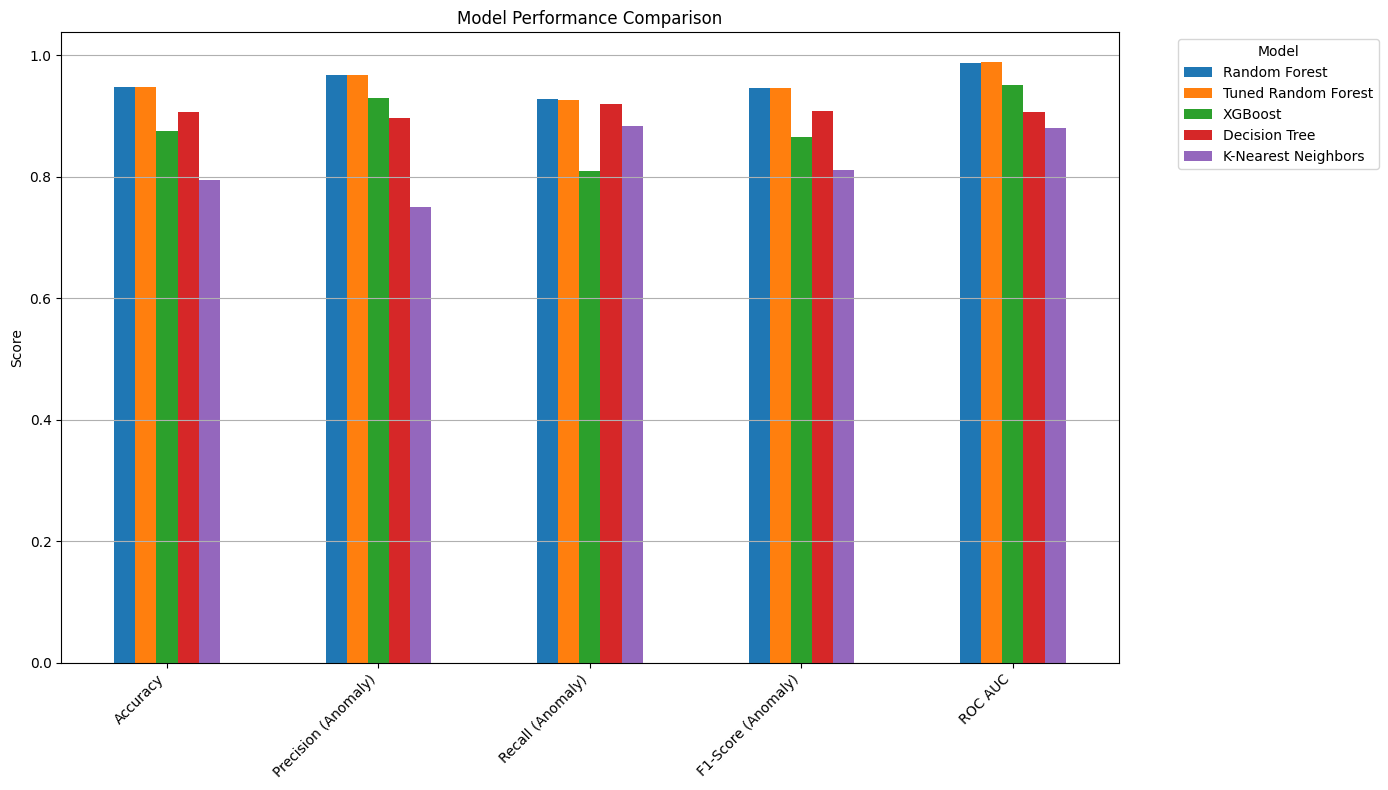

In [ ]:
# Transpose the DataFrame for easier plotting
metrics_df_T = metrics_df.T

# Plot the metrics
plt.figure(figsize=(14, 8))
metrics_df_T.plot(kind='bar', figsize=(14, 8))
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y')
plt.show()

### Making Prediction on random rows to check if model are predicting correctly or not

In [ ]:
# Take 10 random rows from the test set for prediction
n_samples = 10
# Get indices for each class in y_test
anomaly_indices = y_test[y_test == 1].index
non_anomaly_indices = y_test[y_test == 0].index

# Calculate how many samples to take from each class
num_anomaly = min(n_samples // 2, len(anomaly_indices))
num_non_anomaly = min(n_samples - num_anomaly, len(non_anomaly_indices))

# Randomly sample indices from each class
sampled_anomaly_indices = np.random.choice(anomaly_indices, num_anomaly, replace=False)
sampled_non_anomaly_indices = np.random.choice(non_anomaly_indices, num_non_anomaly, replace=False)

# Combine the sampled indices
sample_indices = np.concatenate([sampled_anomaly_indices, sampled_non_anomaly_indices])

# Shuffle the combined indices
np.random.shuffle(sample_indices)

# Select the random rows from the test set based on sampled indices using iloc
X_sample = X.iloc[sample_indices]
y_sample = y.iloc[sample_indices]
X_sample_scaled = scaler.transform(X_sample)
y_pred_rf_sample = rf.predict(X_sample_scaled)
y_pred_xgb_sample = xgb.predict(X_sample_scaled)
y_pred_dt_sample = dt.predict(X_sample_scaled)

# Create a DataFrame to display predictions and actual values
results_df = pd.DataFrame({
    'Actual Value': y_sample,
    'RF Predicted': y_pred_rf_sample,
    'XGB Predicted': y_pred_xgb_sample,
    'DT Predicted': y_pred_dt_sample
})
print("\nPredictions on a sample of test data:")
display(results_df)


Predictions on a sample of test data:


,Actual Value,RF Predicted,XGB Predicted,DT Predicted
21073,1,1,1,1
23401,0,0,0,0
2698,0,1,1,0
49722,0,0,0,0
14799,1,1,1,1
3094,1,1,1,1
12284,0,0,1,0
45809,1,1,1,1
3031,0,0,0,0
49956,1,1,1,1
